## Advanced Finance Project-2 ETH
<br>
<br>


Building a simple autocorrelation-based forecasting model


#1


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
import sympy as sym
import statsmodels.api
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

## Question - 1

In [4]:
#Question - 1
#Reading the data from CSV file
df = pd.read_excel('/content/augmento_eth_returns.xls')

In [5]:
df.head()

,date,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
0,2016-11-01 01:00:00,10.877,NaN,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2016-11-01 02:00:00,10.860,0.001564,0,0,0,0,0,0,0,...,0,0,0,3,0,1,0,1,0,0
2,2016-11-01 03:00:00,10.744,0.010739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2016-11-01 04:00:00,10.716,0.002610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2016-11-01 05:00:00,10.761,-0.004191,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
df['date'].head()

0    2016-11-01 01:00:00
1    2016-11-01 02:00:00
2    2016-11-01 03:00:00
3    2016-11-01 04:00:00
4    2016-11-01 05:00:00
Name: date, dtype: object

In [7]:
# Drop rows with missing dates
df.dropna(subset=['date'], inplace=True)

# Filter dataframe based on date range
df = df.loc[(df['date'] >= '2016-01-01') & (df['date'] <= '2024-12-31')]

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as index
df.set_index('date', inplace=True)

# Display the first few rows of the dataframe
print(df.head())

                     listing_close   returns  twitter_hacks  \
date                                                          
2016-11-01 01:00:00         10.877       NaN              0   
2016-11-01 02:00:00         10.860  0.001564              0   
2016-11-01 03:00:00         10.744  0.010739              0   
2016-11-01 04:00:00         10.716  0.002610              0   
2016-11-01 05:00:00         10.761 -0.004191              0   

                     twitter_pessimistic_doubtful  twitter_banks  \
date                                                               
2016-11-01 01:00:00                             0              0   
2016-11-01 02:00:00                             0              0   
2016-11-01 03:00:00                             0              0   
2016-11-01 04:00:00                             0              0   
2016-11-01 05:00:00                             0              0   

                     twitter_selling  twitter_market_manipulation  \
date        

In [8]:
# Dropping rows where 'return' column has NaN values
df_cleaned = df.dropna(subset=['returns'])

# Displaying the cleaned DataFrame
print(df_cleaned)

                     listing_close   returns  twitter_hacks  \
date                                                          
2016-11-01 02:00:00         10.860  0.001564              0   
2016-11-01 03:00:00         10.744  0.010739              0   
2016-11-01 04:00:00         10.716  0.002610              0   
2016-11-01 05:00:00         10.761 -0.004191              0   
2016-11-01 06:00:00         10.775 -0.001300              0   
...                            ...       ...            ...   
2024-04-23 11:00:00       3182.000  0.000942              0   
2024-04-23 12:00:00       3189.500 -0.002354              0   
2024-04-23 13:00:00       3211.400 -0.006843              0   
2024-04-23 14:00:00       3252.100 -0.012594              0   
2024-04-23 15:00:00       3226.800  0.007810              0   

                     twitter_pessimistic_doubtful  twitter_banks  \
date                                                               
2016-11-01 02:00:00                         

In [9]:
df = df.dropna(subset=['returns'])

Plot the time-series.

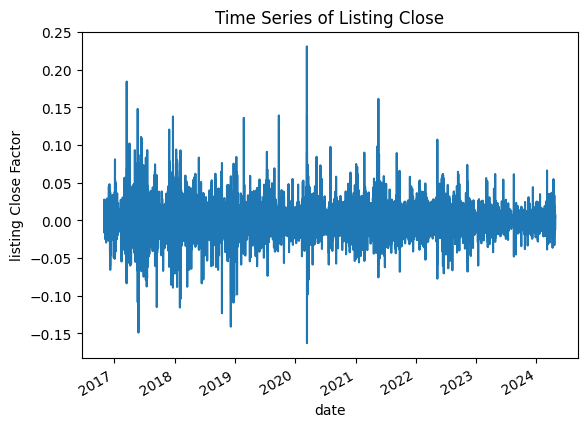

In [10]:
#Part - 1
#Plotting the time series of value-weighted monthly factor returns for the Ret factor
df['returns'].plot() # Plot the 'listing_close' column directly, since 'date' is the index
plt.xlabel('date')
plt.ylabel('listing Close Factor')
plt.title('Time Series of Listing Close')
plt.show()

Give the annualized mean and standard deviation of this return series.

In [11]:
#Calculating the annualized mean and standard deviation of this return series
annualized_mean = df['returns'].mean() * 12
annualized_std_dev = df['returns'].std() * math.sqrt(12)
print("Annualized Mean of this return series is: "+str(annualized_mean))
print("Annualized Standard Deviation of this return series is: "+str(annualized_std_dev))

Annualized Mean of this return series is: -0.0010329272080924826
Annualized Standard Deviation of this return series is: 0.03669837243232558


In [12]:
listing_close = df['returns']

In [13]:
print( listing_close )

date
2016-11-01 02:00:00    0.001564
2016-11-01 03:00:00    0.010739
2016-11-01 04:00:00    0.002610
2016-11-01 05:00:00   -0.004191
2016-11-01 06:00:00   -0.001300
                         ...   
2024-04-23 11:00:00    0.000942
2024-04-23 12:00:00   -0.002354
2024-04-23 13:00:00   -0.006843
2024-04-23 14:00:00   -0.012594
2024-04-23 15:00:00    0.007810
Name: returns, Length: 65396, dtype: float64


Plot the 1st to 60th order autocorrelations of returns

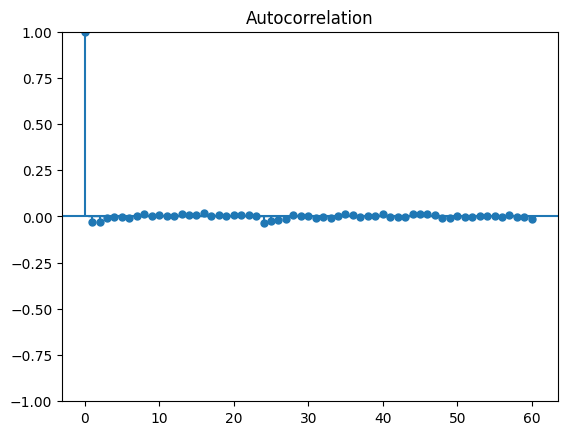

In [14]:

# Plot the Autocorrelation Function (ACF) with 60 lags
plot_acf(listing_close, lags=60)

# Show the plot
plt.show()

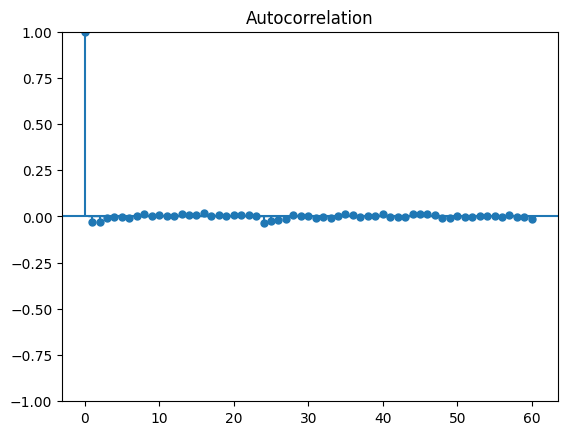

In [15]:
#Part - 2
plot_acf(listing_close, lags = 60)
pyplot.show()

Perform a Ljung-Box test that the first 6 autocorrelations jointly are zero.

In [19]:
#Part - 3

# Assuming 'listing_close' is your time series data
# Handle missing or infinite values
returns = listing_close.pct_change().dropna()

# Perform the Ljung-Box test
returns_clean = returns.replace([np.inf, -np.inf], np.nan).dropna()

sm.stats.acorr_ljungbox(returns_clean, lags=[6], return_df=True)

,lb_stat,lb_pvalue
6,0.185239,0.999876


In [20]:
import numpy as np
from statsmodels.tsa.stattools import acf

# Handle potential zero values
listing_close_nonzero = np.where(listing_close == 0, np.finfo(float).eps, listing_close)

# Calculate returns
returns = np.log(np.array(listing_close_nonzero[1:]) / np.array(listing_close_nonzero[:-1]))

# Replace NaN values in returns with 0
returns = np.nan_to_num(returns, nan=0.0)

# Calculate autocorrelation coefficients
ret_autocorrelation_coefficients = acf(returns, nlags=60, fft=False)

print(ret_autocorrelation_coefficients)


<ipython-input-20-3e8397f048e6>:8: RuntimeWarning: invalid value encountered in log
  returns = np.log(np.array(listing_close_nonzero[1:]) / np.array(listing_close_nonzero[:-1]))


[ 1.00000000e+00 -2.35904763e-01 -7.04345886e-03  7.46291696e-03
 -1.26344392e-02  5.23315964e-03  8.34174594e-03 -1.34616851e-02
  1.12735740e-02 -2.36401960e-03  5.39611915e-04  1.93380042e-04
  9.05790554e-03 -1.92119031e-03  9.23158497e-04 -5.39437525e-03
 -1.92935097e-03  5.35871159e-03 -7.60160058e-03  8.35572862e-03
 -4.46584889e-03  4.41651705e-03 -2.91301603e-03  6.39329315e-03
 -2.07528442e-03 -3.04458912e-03 -2.36859315e-03 -5.28364247e-03
  8.29868494e-04 -3.71781646e-03 -9.39472967e-04  4.26102071e-03
  2.33632547e-03 -7.84831774e-03  1.70747139e-03 -1.19063061e-03
  2.72849485e-03  6.73209726e-03 -3.77186074e-03  2.70579175e-03
 -2.07034922e-04  4.25798355e-03  9.71506523e-05  2.25968098e-03
 -1.10290515e-03 -3.38885326e-03 -6.53898300e-03  4.17350272e-03
  1.96275379e-03  3.60264337e-03 -7.85761208e-03  4.75684735e-03
 -4.78222760e-03 -2.06408365e-03  6.65605018e-03 -2.97658182e-03
 -1.31333910e-03 -1.98820743e-04  7.79105231e-03 -2.80933484e-03
  6.87696692e-04]


In [27]:
ret_autocorrelation_coefficients = acf(returns, nlags=60, fft=False)  # Correction here

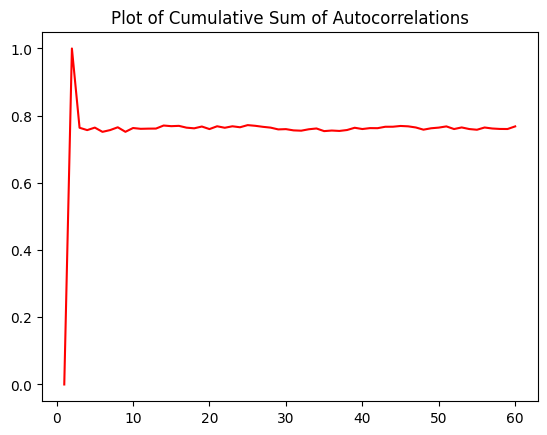

In [28]:
#print("ret Autocorrelation Coefficients are as follows: ")
#print(ret_autocorrelation_coefficients)

def cumulative_sum_autocorrelations(n, ret_acr_coeff):
    cumsum_acr = 0
    # Make sure you don't go beyond the length of the array
    for i in range(min(n, len(ret_acr_coeff))):
        cumsum_acr += ret_acr_coeff[i]
    return cumsum_acr

cumulative_sum_acr = cumulative_sum_autocorrelations(5, ret_autocorrelation_coefficients)
#print("\nCumulative Sum of 5 Autocorrelations is: " +str(cumulative_sum_acr))

cumsum_acr_array = []
for i in range (0, 60):
    cumsum_acr_array.append(cumulative_sum_autocorrelations(i, ret_autocorrelation_coefficients))

x = np.linspace(1, 60, num = 60)
y = cumsum_acr_array
plt.title("Plot of Cumulative Sum of Autocorrelations")
plt.plot(x, y, color="red")

* Explanation of Plots:
As observed in the plot of cumulative sum of autocorrelations, the curve is increasing initially as we have positive autocorrelations for the first 20 orders. As we get more negative autocorrelations, the cumulative sum begins to reduce. The first plot of autocorrelation coefficients exhibits stationarity and therefore exhibits qualities of predictability as well as the first plot is largely centralised.

* The p-value is smaller than 0.05. Hence we reject the null hypothesis, and it means that the RMW series exhibits autocorrelation.

In [29]:
# Check the length of the DataFrame
print(len(df))

65396


In [30]:
print(df.index)

DatetimeIndex(['2016-11-01 02:00:00', '2016-11-01 03:00:00',
               '2016-11-01 04:00:00', '2016-11-01 05:00:00',
               '2016-11-01 06:00:00', '2016-11-01 07:00:00',
               '2016-11-01 08:00:00', '2016-11-01 09:00:00',
               '2016-11-01 10:00:00', '2016-11-01 11:00:00',
               ...
               '2024-04-23 06:00:00', '2024-04-23 07:00:00',
               '2024-04-23 08:00:00', '2024-04-23 09:00:00',
               '2024-04-23 10:00:00', '2024-04-23 11:00:00',
               '2024-04-23 12:00:00', '2024-04-23 13:00:00',
               '2024-04-23 14:00:00', '2024-04-23 15:00:00'],
              dtype='datetime64[ns]', name='date', length=65396, freq=None)


In [31]:
# Drop rows with NaN or infinite values in the 'ret' column
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['returns', 'listing_close'])

# Define predictor and response variables
y = df['returns']
x = df[['listing_close']]  # Using 'Mkt-RF' as the predictor variable

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                returns   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              2.127
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                       0.145
Time:                        19:49:37   Log-Likelihood:                      2.0459e+05
No. Observations:               65396   AIC:                                 -4.092e+05
Df Residuals:                   65395   BIC:                                 -4.092e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In this analysis, we use linear regression to explore the relationship between the Returns and the listing_close. This model investigates how changes in past realized excess market returns influence the return factor, similar to the Ferson and Siegel procedure. This approach helps us gain insights into the potential efficiency of the return factor in relation to market signals.

In [32]:
# Add a constant column to the exogenous variables
x_with_const = sm.add_constant(x)

# Fit linear regression model with the constant term
model_with_const = sm.OLS(y, x_with_const).fit()

# View model summary
print(model_with_const.summary())

# Perform White's test
white_test = het_white(model_with_const.resid, model_with_const.model.exog)
print(white_test)


                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0005639
Date:                Thu, 04 Jul 2024   Prob (F-statistic):              0.981
Time:                        19:49:41   Log-Likelihood:             2.0459e+05
No. Observations:               65396   AIC:                        -4.092e+05
Df Residuals:                   65394   BIC:                        -4.092e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.707e-05   5.88e-05     -1.480

The White's test is a statistical test used to detect the presence of heteroskedasticity in the residuals of a regression model. Heteroskedasticity refers to the situation where the variance of the error terms is not constant, which violates one of the key assumptions of the ordinary least squares (OLS) regression model. [1]

The basic idea behind the White's test is as follows:

Fit the original OLS regression model and obtain the residuals.

Construct an auxiliary regression model where the dependent variable is the squared residuals from the original model, and the independent variables are:

The original independent variables

The squares of the original independent variables

The cross-products of the original independent variables

Compute the test statistic as the product of the number of observations (n) and the R-squared value from the auxiliary regression (nR^2).

Compare the test statistic to a chi-square distribution with degrees of freedom equal to the number of independent variables in the auxiliary regression (excluding the intercept).

If the test statistic is greater than the critical value from the chi-square distribution, then the null hypothesis of homoscedasticity (constant variance) is rejected, and there is evidence of heteroscedasticity.

The key advantage of the White's test is that it does not require any assumptions about the form of the heteroscedasticity. It is a general test that can detect various types of heteroscedasticity patterns.

If the White's test indicates the presence of heteroscedasticity, you can consider using alternative estimation methods, such as weighted least squares (WLS) or robust standard errors, to address the issue and obtain valid statistical inferences.